In [ ]:
from models import BlackScholes, MonteCarlo, Heston, Dupire, SABR
from calibration import Calibration
from visualization.graphics import Graphics
import datetime as dt
import pandas as pd
import numpy as np

In [14]:
import yfinance as yf
g = yf.Ticker('^SPX')
g.options

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [13]:
g.options

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [8]:
ticker = '^SPX'
end  = dt.datetime.now()
start = end - dt.timedelta(days=180) # 180 days is common when you consider the volatility constant
calibration = Calibration(ticker, start, end)


1 Failed download:
['^SPX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')



1 Failed download:
['^SPX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


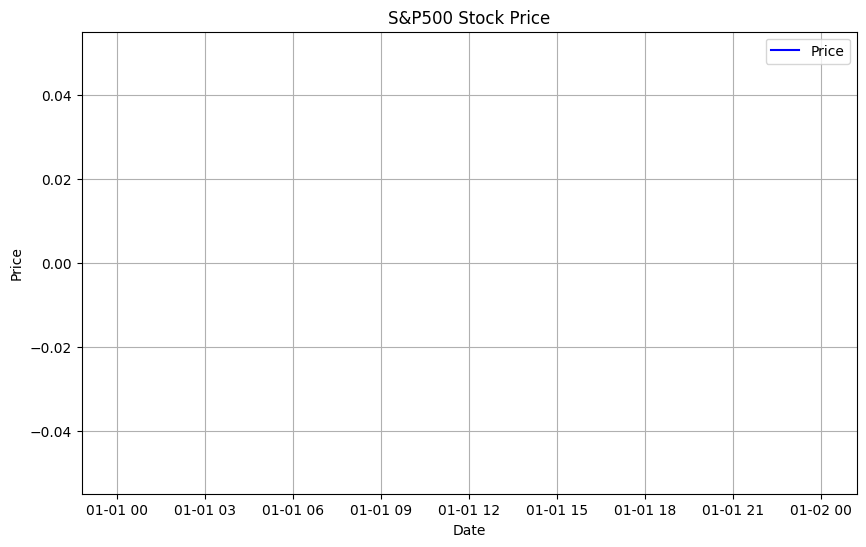

In [3]:
spx_historical_prices = calibration.get_historical_prices_df()
# Initialize Graphics class
graphics = Graphics()
# Plot stock chart
graphics.plot_stock_chart(spx_historical_prices, 'S&P500')

In [4]:
S0 = calibration.get_latest_price()
S0 # Current price of the underlying asset

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [ ]:
K = S0 # Strike price
T = 1  # Time to maturity (1 year)

In [ ]:
hist_mu = calibration.get_historical_mu()
hist_sigma = calibration.get_historical_sigma()
r = calibration.get_risk_free_rate()
print(f"Historical mu: {hist_mu}, Historical sigma: {hist_sigma}, Risk free rate: {r}")

Historical mu: 0.0084, Historical sigma: 0.1269, Risk free rate: 0.0422


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, dt, n_simulations):
    """
    Simulate geometric Brownian motion trajectories.

    Parameters:
        S0 : float - Initial stock price
        mu : float - Drift (expected return)
        sigma : float - Volatility
        T : float - Time horizon (in years)
        dt : float - Time step (in years)
        n_simulations : int - Number of simulations

    Returns:
        numpy.ndarray: Simulated price paths (n_simulations x time_steps)
    """
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps)
    W = np.random.standard_normal(size=(n_simulations, n_steps))
    W = np.cumsum(W, axis=1) * np.sqrt(dt)  # Cumulative sum to simulate Brownian motion
    drift = (mu - 0.5 * sigma**2) * t
    diffusion = sigma * W
    S = S0 * np.exp(drift + diffusion)
    return S

# Parameters
S0 = calibration.get_latest_price()  # Initial price
mu = hist_mu  # Historical drift
sigma = hist_sigma  # Historical volatility
T = 1  # Time horizon (1 year)
dt = 1/252  # Time step (assuming 252 trading days in a year)
n_simulations = 100  # Number of simulations

# Simulate trajectories
simulated_paths = simulate_gbm(S0, mu, sigma, T, dt, n_simulations)

# Plot simulated trajectories
plt.figure(figsize=(10, 6))
for i in range(n_simulations):
    plt.plot(simulated_paths[i], lw=1)
plt.title('Simulated S&P500 Trajectories (BSM Model)')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.show()

In [ ]:
# Get real market data
real_prices = spx_historical_prices['Close'].values
real_dates = spx_historical_prices.index

# Plot real market data and simulated trajectories
plt.figure(figsize=(10, 6))
plt.plot(real_dates, real_prices, label='Real Market Data', color='black', lw=2)

# Plot simulated trajectories
for i in range(n_simulations):
    plt.plot(real_dates[-len(simulated_paths[i]):], simulated_paths[i], lw=1, alpha=0.5)

plt.title('Real Market Data vs Simulated S&P500 Trajectories (BSM Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()